In [2]:
import os
home=os.path.expanduser("~")
import findspark
findspark.init(os.path.join(home,"Downloads","spark-2.0.0-bin-hadoop2.6"))
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).config('spark.sql.warehouse.dir','file:///C:/Users/DongkyuShin/Desktop/bigdata/s_201111235/201111235/bigdata').getOrCreate()

In [3]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.path.expanduser("~"),'Downloads','spark-2.0.0-bin-hadoop2.6')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [4]:
for i in sys.path:
    print i

C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\pyspark.zip
C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\py4j-0.10.1-src.zip
C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python
C:\Users\DongkyuShin\AppData\Local\Temp\spark-ba694c92-30b3-44a1-b4dc-baf6902c4245\userFiles-5ebd60fd-ac53-4116-b820-da6cecc0b179
C:\Users\DongkyuShin\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\py4j-0.10.1-src.zip

C:\Users\DongkyuShin\Anaconda2\python27.zip
C:\Users\DongkyuShin\Anaconda2\DLLs
C:\Users\DongkyuShin\Anaconda2\lib
C:\Users\DongkyuShin\Anaconda2\lib\plat-win
C:\Users\DongkyuShin\Anaconda2\lib\lib-tk
C:\Users\DongkyuShin\Anaconda2
C:\Users\DongkyuShin\Anaconda2\lib\site-packages
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\Sphinx-1.5.1-py2.7.egg
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\win32
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\win32\lib
C:\Users\DongkyuShin\Anaconda2\lib\site-packages\Pythonwin
C:\Users\DongkyuShin\An

In [6]:

from pyspark.sql import Row
import numpy as np
import matplotlib.pyplot as plt
cfile= os.path.join(os.path.expanduser("~"),\
           "Desktop/bigdata/s_201111235/201111235/bigdata/data/tottenham/playerlist.txt")
rdd = spark.sparkContext.textFile(cfile)
parts = rdd.map(lambda x:x.split("\t"))
player = parts.map(lambda p: Row(PlayerNumber=int(p[0].strip()),Name=p[1],Atrribute=int(p[2].strip()),Goal=int(p[3].strip()),Win=int(p[4].strip()), Lose=int(p[5].strip()),Play=int(p[6].strip()),Winper=float(p[7].strip())))

tDf = spark.createDataFrame(player)

tDf.printSchema()
_atrributeRdd=tDf.rdd.map(lambda fields:fields[0]).collect()
_goalRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
_loseRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
_nameRdd=tDf.rdd.map(lambda fields:fields[3]).collect()
_playRdd=tDf.rdd.map(lambda fields:fields[4]).collect()
_numberRdd=tDf.rdd.map(lambda fields:fields[5]).collect()
_winRdd=tDf.rdd.map(lambda fields:fields[6]).collect()
_winperRdd=tDf.rdd.map(lambda fields:fields[7]).collect()




root
 |-- Atrribute: long (nullable = true)
 |-- Goal: long (nullable = true)
 |-- Lose: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Play: long (nullable = true)
 |-- PlayerNumber: long (nullable = true)
 |-- Win: long (nullable = true)
 |-- Winper: double (nullable = true)



-------------------------------------------------------------------
They are currently playing at EPL.
PlayerNumber, PlayerName, Goal, Number of Wins, Number of Losses.
7 Son Heung-Min 18 39 9
2 Kyle Walker 5 107 39
3 Danny Rose 9 66 34
4 Toby Alderweireld 6 54 18
5 Jan Vertonghen 4 85 32
16 Kieran Trippier 1 22 21
27 Kevin Wimmer 0 9 2
33 Ben Davies 4 55 37
11 Erik Lamela 8 42 20
15 Eric Dier 7 57 18
19 Mousa Dembele 12 107 47
20 Dele Alli 28 45 8
23 Christian Eriksen 31 75 28
10 Harry Kane 78 66 23
12 Victor Wanyama 8 63 31
9 Vincent Janssen 2 17 3
25 Josh Onomah 0 8 2
29 Harry Winks 1 14 3
30 Pau Lopez 0 0 0
17 Moussa Sissoko 11 58 59
14 Georges Kevin-Nkoudou 0 5 2
1 Hugo Lloris 59 98 34
13 Michel Vorm 31 32 37
-------------------------------------------------------------------
Please enter 11 player numbers.
7
2
3
4
5
16
20
23
10
17
13
-------------------------------------------------------------------
The odds of the selected player.
Son Heung-Min 7 81.25
Kyle Walker 2 73.28767123

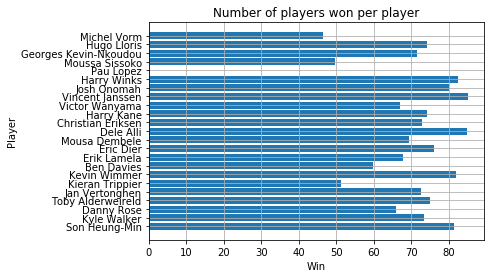

In [7]:

from pyspark.sql import Row
import numpy as np
import matplotlib.pyplot as plt
cfile= os.path.join(os.path.expanduser("~"),\
           "Desktop/bigdata/s_201111235/201111235/bigdata/data/tottenham/playerlist.txt")
rdd = spark.sparkContext.textFile(cfile)
parts = rdd.map(lambda x:x.split("\t"))
player = parts.map(lambda p: Row(PlayerNumber=int(p[0].strip()),Name=p[1],Atrribute=int(p[2].strip()),Goal=int(p[3].strip()),Win=int(p[4].strip()), Lose=int(p[5].strip()),Play=int(p[6].strip()),Winper=float(p[7].strip())))

tDf = spark.createDataFrame(player)

_atrributeRdd=tDf.rdd.map(lambda fields:fields[0]).collect()
_goalRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
_loseRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
_nameRdd=tDf.rdd.map(lambda fields:fields[3]).collect()
_playRdd=tDf.rdd.map(lambda fields:fields[4]).collect()
_numberRdd=tDf.rdd.map(lambda fields:fields[5]).collect()
_winRdd=tDf.rdd.map(lambda fields:fields[6]).collect()
_winperRdd=tDf.rdd.map(lambda fields:fields[7]).collect()

value=[None]*11
odd=0
print ("-------------------------------------------------------------------")
print ("They are currently playing at EPL.")
print ("PlayerNumber, PlayerName, Goal, Number of Wins, Number of Losses.")
for i in range(0,23):
    print np.array(_numberRdd)[i],np.array(_nameRdd)[i],np.array(_goalRdd)[i],np.array(_winRdd)[i],np.array(_loseRdd)[i]
print ("-------------------------------------------------------------------")
print ("Please enter 11 player numbers.")
for i in range(0,11):
    playerselect=input("")
    value[i]=playerselect
print ("-------------------------------------------------------------------")
print ("The odds of the selected player.")

for i in range(0,11):
    for j in range(0,23):
        if value[i]==np.array(_numberRdd)[j]:
            odd=odd+float(np.array(_winperRdd)[i])
            print np.array(_nameRdd)[i],np.array(_numberRdd)[i],np.array(_winperRdd)[i]
            
oddsum=odd/11
print ("-------------------------------------------------------------------")
print ("The odds average of 11 players.")
print oddsum
print ("-------------------------------------------------------------------")

def barchart(data,labels):
    num_bars = len(data)
    positions = range(1, num_bars + 1)
    plt.barh(positions, data, align='center') 
    plt.yticks(positions, labels)
    plt.xlabel('Win Odd')
    plt.ylabel('Player')
    plt.title('Number of players won per player')
    plt.grid() 
    plt.show()

barchart(_winperRdd,_nameRdd)


In [1]:
%%writefile .py
# coding: utf-8
from pyspark.sql import Row
import numpy as np
import matplotlib.pyplot as plt

team=[None]*2
vsodd=[None]*2
print ("Insert Tow Team.")
for i in range(0,2):
    team[i]=raw_input("")
for i in range(0,2):  
    if team[i]=='tottenham':
        cfile= os.path.join(os.path.expanduser("~"),\
                   "Desktop/bigdata/s_201111235/201111235/bigdata/data/tottenham/playerlist.txt")
        rdd = spark.sparkContext.textFile(cfile)
        parts = rdd.map(lambda x:x.split("\t"))
        player = parts.map(lambda p: Row(PlayerNumber=int(p[0].strip()),Name=p[1],Atrribute=int(p[2].strip()),Goal=int(p[3].strip()),Win=int(p[4].strip()), Lose=int(p[5].strip()),Play=int(p[6].strip()),Winper=float(p[7].strip())))

        tDf = spark.createDataFrame(player)

        _atrributeRdd=tDf.rdd.map(lambda fields:fields[0]).collect()
        _goalRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
        _loseRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
        _nameRdd=tDf.rdd.map(lambda fields:fields[3]).collect()
        _playRdd=tDf.rdd.map(lambda fields:fields[4]).collect()
        _numberRdd=tDf.rdd.map(lambda fields:fields[5]).collect()
        _winRdd=tDf.rdd.map(lambda fields:fields[6]).collect()
        _winperRdd=tDf.rdd.map(lambda fields:fields[7]).collect()

        value=[None]*11
        odd=0
        print ("-------------------------------------------------------------------")
        print ("They are currently playing at EPL.")
        print ("PlayerNumber, PlayerName, Goal, Number of Wins, Number of Losses.")
        for i in range(0,23):
            print np.array(_numberRdd)[i],np.array(_nameRdd)[i],np.array(_goalRdd)[i],np.array(_winRdd)[i],np.array(_loseRdd)[i]
        print ("-------------------------------------------------------------------")
        print ("Please enter 11 player numbers.")
        for i in range(0,11):
            playerselect=input("")
            value[i]=playerselect
        print ("-------------------------------------------------------------------")
        print ("The odds of the selected player.")

        for i in range(0,11):
            for j in range(0,23):
                if value[i]==np.array(_numberRdd)[j]:
                    odd=odd+float(np.array(_winperRdd)[i])
                    print np.array(_nameRdd)[i],np.array(_numberRdd)[i],np.array(_winperRdd)[i]

        oddsum=odd/11
        vsodd[i]=oddsum
        print ("-------------------------------------------------------------------")
        print ("The odds average of 11 players.")
        print oddsum
        print ("-------------------------------------------------------------------")

        def barchart(data,labels):
            num_bars = len(data)
            positions = range(1, num_bars + 1)
            plt.barh(positions, data, align='center') 
            plt.yticks(positions, labels)
            plt.xlabel('Win Odd')
            plt.ylabel('Player')
            plt.title('Number of players won per player')
            plt.grid() 
            plt.show()

        barchart(_winperRdd,_nameRdd)
        
print team[1],("vs"),team[2],(":"),vsodd[1],("vs"),vsodd[2]


Writing .py
